In [13]:
import numpy as np
import tools.tex_1D_visualization as vis
import matplotlib.pyplot as plt

In [22]:
#### MSE ###
fpo_pos = 'mse2D_PropOffsetPos_20190510_22h15m44s'
fpa_pos = 'mse2D_PropApproxPos_20190513_19h17m21s'
fpagrad_pos = 'mse2D_PropApproxPos_20190510_22h15m44s'
fpo_neg = 'mse2D_PropOffsetNeg_20190511_09h04m54s'
fpa_neg = 'mse2D_PropApproxNeg_20190513_19h11m47s'
fpagrad_neg = 'mse2D_PropApproxNeg_20190511_09h04m54s'

### load data
## Positive error
po_pos = np.load('npy_data/mse/{}.npy'.format(fpo_pos))
pa_pos = np.load('npy_data/mse/{}.npy'.format(fpa_pos))
pagrad_pos = np.load('npy_data/mse/{}.npy'.format(fpagrad_pos))
## Negative error
po_neg = np.load('npy_data/mse/{}.npy'.format(fpo_neg))
pa_neg = np.load('npy_data/mse/{}.npy'.format(fpa_neg))
pagrad_neg = np.load('npy_data/mse/{}.npy'.format(fpagrad_neg))
# Flip the array w.r.t. error
po_neg = np.flip(po_neg, 0)
pa_neg = np.flip(pa_neg, 0)
pagrad_neg = np.flip(pagrad_neg, 0)
# Remove the ErrFree part
po_neg = np.delete(po_neg, -1, 0)
pa_neg = np.delete(pa_neg, -1, 0)
pagrad_neg = np.delete(pagrad_neg, -1, 0)

### Combine positive and negative error
mse_po = np.concatenate((po_neg, po_pos), axis = 0)
mse_pa = np.concatenate((pa_neg, pa_pos), axis = 0)
mse_pagrad = np.concatenate((pagrad_neg, pagrad_pos), axis = 0)

In [24]:
## Compare the MSEs (np.gradient vs direct derivative) ##
# pa_pos : direct derivative
# pa_pos_grad : one with the 
print(np.array_equal(mse_pagrad, mse_pa)) 
print(mse_pagrad[80])
print(mse_pa[80])

False
[1.4        0.92162781]
[1.4        0.83614379]


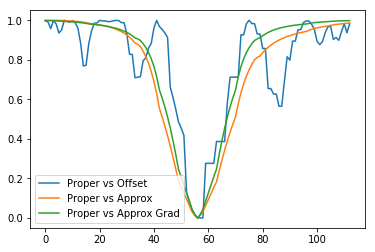

In [28]:
plt.plot(mse_po[:, 1])
plt.plot(mse_pa[:, 1])
plt.plot(mse_pagrad[:, 1])
plt.legend(['Proper vs Offset', 'Proper vs Approx', 'Proper vs Approx Grad'])

In [18]:
# TeX settings
fname_json = 'tools/TUI_FRI_colors.json'
colors = ['TUI_blue_dark']
mark = ['']
xlabel = 'Deviation [mm]'
ylabel = 'Mean Squared Error'

In [3]:
#### fname ###
## Path ##
# Mac
path = '/Users/sayakokodera/Uni/Master/RP_19SS/Paper/pytikz'
# Windows Home PC
#path = '/Users/Sayako/Master/RP_19SS/Paper/pytikz'

## Get date ##
from tools.datetime_formatter import DateTimeFormatter
dtformatter = DateTimeFormatter()
today = dtformatter.get_date_str()

fpo = '{}/mse2D_PropOffset_{}.tex'.format(path, today)
fpa = '{}/mse2D_PropApprox_{}.tex'.format(path, today)
foa = '{}/mse2D_OffsetApprox_{}.tex'.format(path, today)

In [7]:
# Rather with generate_coordinates_for_addplot for each mse?
xvalues = np.around(mse_po[:, 0], 2)
# Write TeX files
vis.generate_coordinates(xvalues, fpo, False, mse_po[:, 1])
vis.generate_coordinates(xvalues, fpa, False, mse_pa[:, 1])
vis.generate_coordinates(xvalues, foa, False, mse_oa[:, 1])

## A-Scan Visualization

In [15]:
# load data
data_ref = np.load('npy_data/data_2D_paramset_3031.npy')
posscan_set_ID = [10]
ascan_ref = data_ref[:, posscan_set_ID[0]]
# file name setting
import datetime
now = datetime.datetime.now()
curr_date = '{}0{}{}'.format(now.year, now.month, now.day)
# err free
ascan_errfree = np.load('npy_data_storage/{}/ascan_ErrFree.npy'.format(curr_date))


In [19]:
error_range = [0.1, 0.25, 0.5, 0.75, 1, 1.26, 1.5, 2, 2.5, 3, 3.5,
                        4, 4.5, 5, 6, 7, 8, 9, 10, 11, 12, 12.6, 13, 14, 15, 
                        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 
                        29, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 55, 
                        60, 65, 70, 75, 80, 90, 100]
# get index of each error -> load data
# 0.126mm
idx_0126 = error_range.index(1.26)
# 0.5mm
idx_05 = error_range.index(5)
# 1mm
idx_1 = error_range.index(10)
# 1.26mm
idx_1_26 = error_range.index(12.6)
# 2mm
idx_2 = error_range.index(20)
# 4mm
idx_4 = error_range.index(40)
# 10mm
idx_10 = error_range.index(100)

# all index
idx_list = [idx_0126, idx_05, idx_1, idx_1_26, idx_2, idx_4, idx_10]

# setting for 1D visualization
x_value = np.arange(ascan_ref.shape[0])
colors = ['TUI_blue_dark', 'TUI_orange_dark']
mark = ['', '']
xlabel = 't / dt'
ylabel = 'Maginitude'

for curr_idx in idx_list:
    # load data
    curr_ascan = np.load('npy_data_storage/{}/ascan_ErrNo_{}.npy'.format(curr_date, curr_idx))
    # set fname
    curr_fnametex = '/Users/sayakokodera/Uni/Master/RP_19SS/Paper/pytikz/ascans/{}/ascan_ErrNo_{}.tex'.format(curr_date, curr_idx)
    vis.generate_tex_file_with_1D_plot(x_value, fname_json, colors, mark, xlabel, ylabel, 
                                   curr_fnametex, curr_ascan, ascan_ref)
    

In [20]:
# for error free data
fname_errfree = '/Users/sayakokodera/Uni/Master/RP_19SS/Paper/pytikz/ascans/{}/ascan_ErrFree.tex'.format(curr_date)
vis.generate_tex_file_with_1D_plot(x_value, fname_json, colors, mark, xlabel, ylabel, 
                                   fname_errfree, ascan_errfree, ascan_ref)

In [23]:
# calculation
ref = pow(10.0, -6 / 20.0)
0.5* 1/(4.0 * np.log(ref))

-0.1809560341263549